## Exercise 1

In this exercise you need to plot ocean depth against ocean age. You have the topography / bathymetry data and the age data. You should do this for the "deep oceans" to avoid including the continental shelves and, for that matter, the continents. The age dataset is only valid where there are magnetic stripes. Other places in the grid are flagged as _"Not a Number"_ or _NaN_ and will not plot. You might have to strip out these points for plotting / curve fitting though.

### Instructions 

You can submit this notebook by email but you MUST rename it so we know who it is from. If you used a crazy pseudonym, please let us know when you submit your assigments. 

I expect to be able to run this notebook before I read your answer!

In [1]:
%pylab inline


import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cfeature

Populating the interactive namespace from numpy and matplotlib


## Hint

You will need to have the two datasets at the same resolution and valid data shape. The data are stored in an image so re-interpolation can be done with the image resizing fanciness available in ... (guess where !)

In [2]:
from skimage.transform import resize as imresize

# load in ETOPO1 data
with np.load("../Data/Resources/ETOPO1_Ice_c_geotiff.npz", 'r') as npz:
    etopoH_img = npz['data']

# resample
etopoH_img = etopoH_img[::4,::4]

# load in age data
ages = np.load("../Data/Resources/global_age_data.3.6.z.npz")["ageData"]

etopoH_1 = imresize(etopoH_img, ages.shape, order=1, mode='wrap', preserve_range=True)
#etopoH_1 = imresize(etopoH_img, ages.shape, order=1, mode='wrap')
etopoH_1[ np.isnan(ages) ] = np.nan

print (etopoH_img.shape)
print (etopoH_1.shape)
print (ages.shape)




(2700, 5400)
(1801, 3601)
(1801, 3601)


## Task

Make a map of `etopoH_1` and `ages` (check they are the same shape and same NaN mask)

It may also help to plot plate motion arrows on the map to highlight divergent v. convergent zones. In order to do this "intuitively" you probably should choose the NNR (no net rotation) velocity field which tends to show major ridges as spreading in opposite directions. 

You will need to think about:

  * which features are useful to include (a coastline, shaded relief etc ?) 
  * plate motion arrows (see `GlobalPlateMotions` notebook) ? 

In [3]:
#map features included here for ease of coding
base_projection     = projection=ccrs.Mollweide() 
global_extent     = [-180.0, 180.0, -90.0, 90.0]

coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                           edgecolor=(0.0,0.0,0.0),
                           facecolor="none")
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                           edgecolor="green",
                           facecolor="blue")


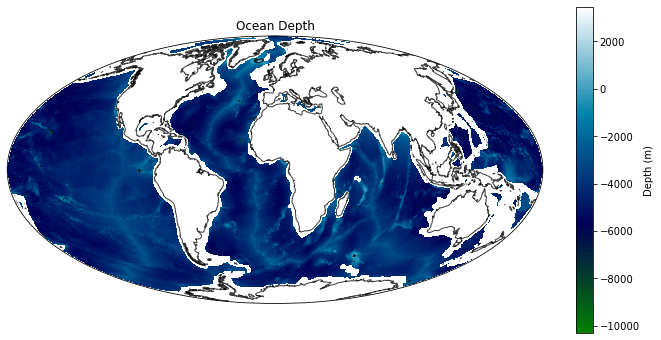

In [4]:
## Code here 


#code for map below
fig = plt.figure(figsize=(12, 6), facecolor="none")
ax = plt.axes(projection=base_projection)
plt.imshow(etopoH_1, transform=ccrs.PlateCarree(), cmap = 'ocean', origin="upper", 
          alpha=1.0, extent=global_extent,  zorder=0)

#adding title, colourbar etc
plt.title('Ocean Depth')
cb = plt.colorbar(orientation='vertical')
cb.set_label('Depth (m)')

#adding coastline
ax.add_feature(coastline, linewidth=1.0,  edgecolor="#000000", zorder=2, alpha=0.75)



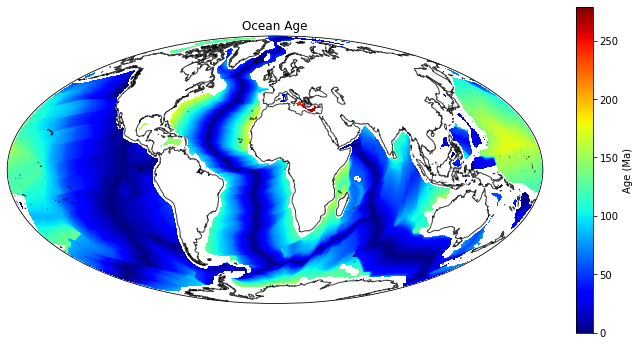

In [5]:
## Code here 

#map
fig = plt.figure(figsize=(12, 6), facecolor="none")
ax = plt.axes(projection=base_projection)
plt.imshow(ages, transform=ccrs.PlateCarree(), cmap = 'jet', origin="upper", 
          alpha=1.0, extent=global_extent,  zorder=0)

#adding vector arrows (unfortunately the data was unusable, something about pickling)


#adding title, colourbar etc
plt.title('Ocean Age')
cb = plt.colorbar(orientation='vertical')
cb.set_label('Age (Ma)')

#adding coastline
ax.add_feature(coastline, linewidth=1.0,  edgecolor="#000000", zorder=2, alpha=0.75)


<font color='Brick'>
Well done! These maps generally work, but Plate Carree projections are not the best choice for global data such as seafloor age and topography, instead, consider Mollweide!

```python
ax = plt.axes(projection=ccrs.Mollweide())
```

You are missing plate velocity vectors mentioned in the task - refer to 8-GlobalPlateMotionsEtc in the mapping section of the course content. Also, filling the masked regions with zeros aren't really doing anything for me visually so I'd scrap those maps. 
</font>

### Task

Make a scatter plot of the depth against age. You might need to downsample the number of points as there are a lot of them:

```python 
ages_decimated = ages[::10]
topo_decimated = etopoH[::10]
``` 

Do you see any systematic trend ?

**Hint:** don't worry if you do not 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Depth (m)')

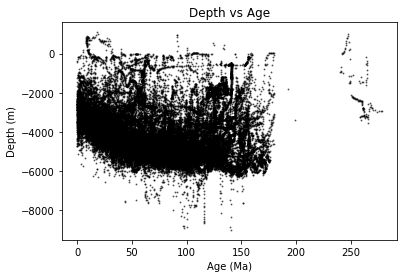

In [6]:
## Code here
#note differences in diced and undiced data
#x = ages[::200]
#y= etopoH_1[::200]
x = ages[::50]
y = etopoH_1[::50]

colors = (0,0,0)
area = 1
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Depth vs Age')
xlabel('Age (Ma)')
ylabel('Depth (m)')

There is a slight systematic trend (depth increases as age increases), but for it to be seen the data needs to be sliced and diced a bit. The data in its original form has no noticeable trend. This is possibly due to the zero values used for the missing continental data

# Smoothing

Now try interpolating the bathymetry to a smoothed / downsampled version of the ages.

```python
ages_reduced = ages[::8,::8] # This is arbitrary, you should try some different ones

# OR

ages_reduced1 = imresize(ages, (226,451), order=0, mode="wrap")

# OR

ages_reduced2 = imresize(ages, (226,451), order=1, mode="wrap")

# OR

ages_reduced3 = imresize(ages, (226,451), order=3, mode="wrap")

```

Comment on which of these is the more effective.


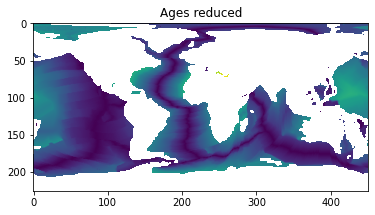

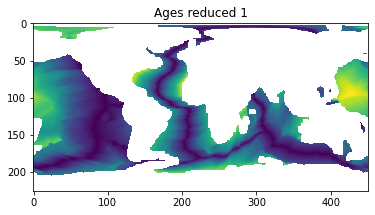

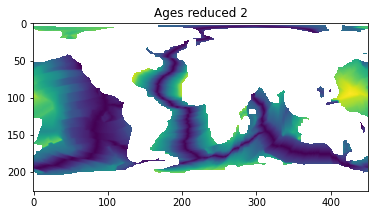

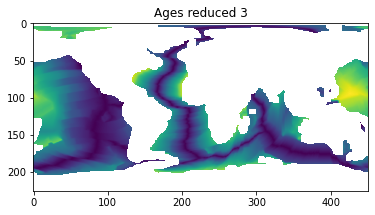

In [7]:
ages_reduced  = ages[::8,::8] # This is arbitrary, you should try some different ones
plt.imshow(ages_reduced)
plt.title('Ages reduced')
plt.show()

ages_reduced1 = imresize(ages, (226,451), order=0, mode="wrap")
plt.imshow(ages_reduced1)
plt.title('Ages reduced 1')
plt.show()

ages_reduced2 = imresize(ages, (226,451), order=1, mode="wrap")
plt.imshow(ages_reduced2)
plt.title('Ages reduced 2')
plt.show()

ages_reduced3 = imresize(ages, (226,451), order=3, mode="wrap")
plt.imshow(ages_reduced3)
plt.title('Ages reduced 3')
plt.show()


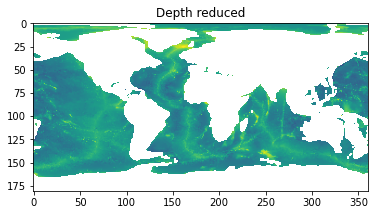

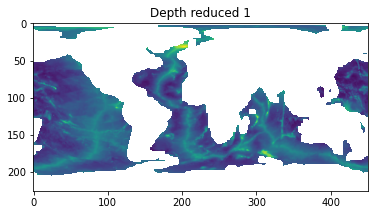

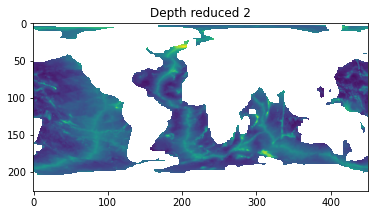

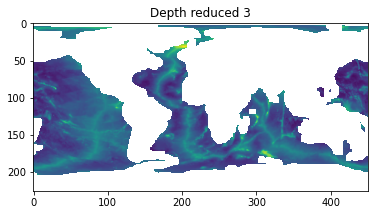

In [8]:
## Have a go ... 
#for Bathymetry

bath_reduced  = etopoH_1[::10,::10] # This is arbitrary, you should try some different ones
plt.imshow(bath_reduced)
plt.title('Depth reduced')
plt.show()

bath_reduced1 = imresize(etopoH_1, (226,451), order=0, mode="wrap")
plt.imshow(bath_reduced1)
plt.title('Depth reduced 1')
plt.show()

bath_reduced2 = imresize(etopoH_1, (226,451), order=1, mode="wrap")
plt.imshow(bath_reduced2)
plt.title('Depth reduced 2')
plt.show()

bath_reduced3 = imresize(etopoH_1, (226,451), order=3, mode="wrap")
plt.imshow(bath_reduced3)
plt.title('Depth reduced 3')
plt.show()

The ""_reduced3 cases for both produces a smoother, sharper image. Compare this to the ""_reduced case, in which the data is sliced and diced, which produces a similar map as the original but at the cost of resolution.

### Task

Plot the age/depth data and see if it looks smoother.

Make a scatterplot with this data too (note: you will have to downsample the bathymetry too)

Does smoothing help bring out a trend ?


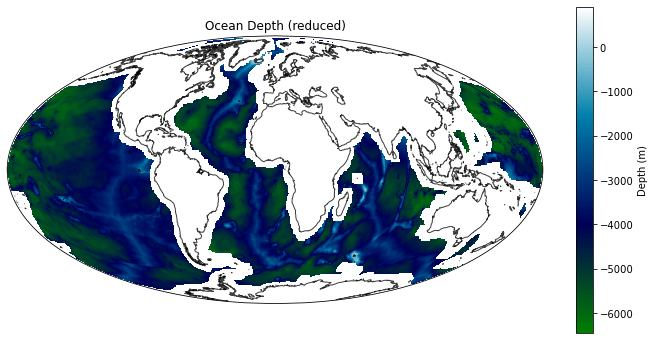

In [9]:
### Your code here 
fig = plt.figure(figsize=(12, 6), facecolor="none")
ax = plt.axes(projection=base_projection)
plt.imshow(bath_reduced3, transform=ccrs.PlateCarree(), cmap = 'ocean', origin="upper", 
          alpha=1.0, extent=global_extent,  zorder=0)

#adding title, colourbar etc
plt.title('Ocean Depth (reduced)')
cb = plt.colorbar(orientation='vertical')
cb.set_label('Depth (m)')

#adding coastline
ax.add_feature(coastline, linewidth=1.0,  edgecolor="#000000", zorder=2, alpha=0.75)


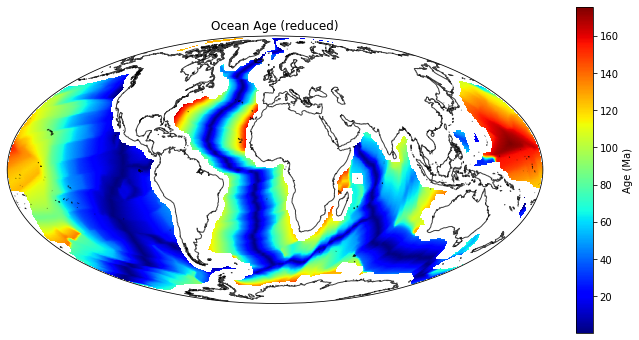

In [10]:
fig = plt.figure(figsize=(12, 6), facecolor="none")
ax = plt.axes(projection=base_projection)
plt.imshow(ages_reduced3, transform=ccrs.PlateCarree(), cmap = 'jet', origin="upper", 
          alpha=1.0, extent=global_extent,  zorder=0)


#adding title, colourbar etc
plt.title('Ocean Age (reduced)')
cb = plt.colorbar(orientation='vertical')
cb.set_label('Age (Ma)')

#adding coastline
ax.add_feature(coastline, linewidth=1.0,  edgecolor="#000000", zorder=2, alpha=0.75)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Depth (m)')

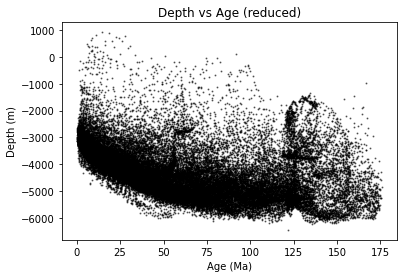

In [11]:
#scatter plot
x = ages_reduced3
y = bath_reduced3

colors = (0,0,0)
area = 1
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Depth vs Age (reduced)')
xlabel('Age (Ma)')
ylabel('Depth (m)')

There is now a somewhat noticeable trend in the data. As age increases, the depth (that is, the depth values in the negatives) increases. Again, if the data is further diced using [::i,::i] then the trend becomes clearer as below

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Depth (m)')

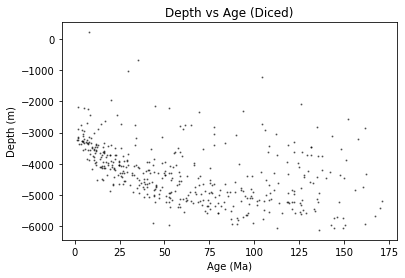

In [12]:
#scatter plot
age_diced = ages_reduced3[::10,::10]
bath_diced = bath_reduced3[::10,::10]

colors = (0,0,0)
area = 1
plt.scatter(age_diced, bath_diced, s=area, c=colors, alpha=0.5)
plt.title('Depth vs Age (Diced)')
xlabel('Age (Ma)')
ylabel('Depth (m)')

<font color='brick'>
Good! Nice job!
</font>

### Task

Fit $ \textrm{depth} = A + B\sqrt{\textrm{age}} $ to this data and create a plot

You should be able to use 

```python
from scipy.optimize import curve_fit
help(curve_fit)
```



In [13]:
from scipy.optimize import curve_fit

In [14]:
#making age data 1D
age_resized = reshape(age_diced, age_diced.size)
def func(x, a, b):
    """function for the above equation"""    
    return a+b*sqrt(x)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


func(x, a=-3166.4526978099466, b=-153.76780606465852,)


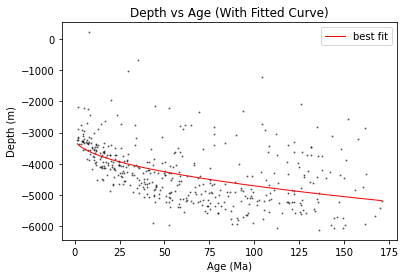

In [15]:
### Your code here 


# flatten the arrays so they are 1D
x = age_diced.ravel()
y = bath_diced.ravel()
# Removing NaN.
nan_x = np.isnan(x)
nan_y = np.isnan(y)
non_x = ~nan_x
non_y = ~nan_y
fix_x = x[non_x]
fix_y = y[non_y]

popt, pcov = curve_fit(func, fix_x, fix_y)
print ("func(x, a={}, b={},)".format(popt[0], popt[1]))


# adjusting data (so multiple lines aren't produced in the plot)
xaj = np.linspace(min(fix_x), max(fix_x), 1000)
yaj = func(xaj, *popt)

# scatter plot
colors = (0,0,0)
area = 1
plt.scatter(fix_x, fix_y, s=area, c=colors, alpha=0.5)
plt.title('Depth vs Age (With Fitted Curve)')
xlabel('Age (Ma)')
ylabel('Depth (m)')
#plotting curve
plt.plot(xaj, yaj, 'r-', label='best fit', linewidth=1)
plt.legend()


By removing NaN values and by avoiding masking the NaN values to 0s I have avoided making a plot where the line that is fitted is not skewed to the 0,0 values that replace the NaNs in the data, thus producing a plot that has a nicely fitted curve.

<font color='brick'>
Uh oh. I reckon you gave up on this too soon... you already have x and y data that you diced up in the previous task. Fit your curve to those data and see what you get.

```python
# flatten the arrays so they are 1D
x = age_diced.ravel()
y = bath_diced.ravel()

# fit your curve to these data
popt, pcov = curve_fit(func, x, y)
```
    
Then plot the curve on top of your ages and bath scatterplot, like you did before.
   
</font>

### Discussion

Obviously there are problems with the data - looking at every pixel in the image does not account for regions where there are sea mounts or other features on the ocean floor that we might consider anomalous. Actually, the other reason this doesn't work very well is that it fails to account for sediment accumulation and loading.